<a href="https://colab.research.google.com/github/cicaco07/PCVK-2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Aryo Deva Saputra
## Kelas / No : 3D / 08
## NIM : 2141720176

### Tugas Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
pip install pytesseract

In [14]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di bawah.


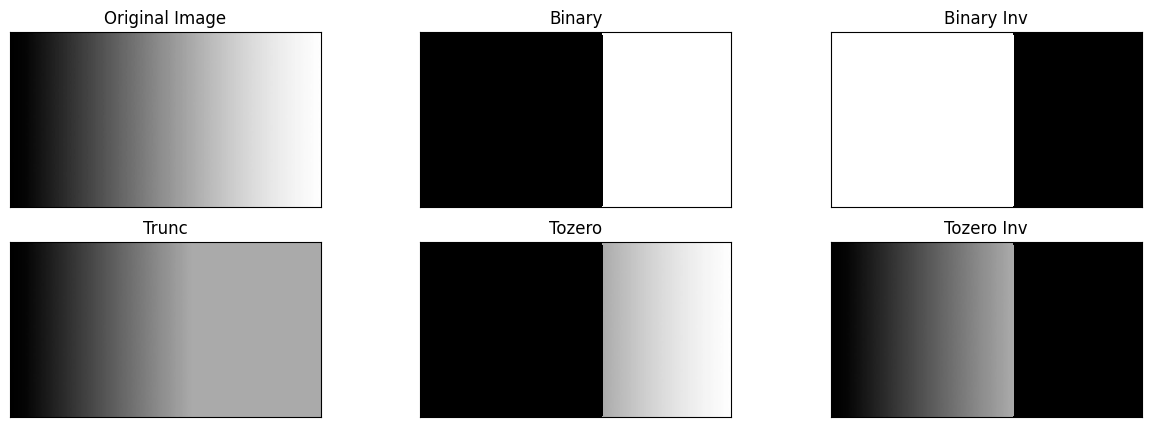

In [23]:
pict_1 = ('/content/drive/MyDrive/PCVK/res1/gradient.jpg')
img_a = cv2.imread(pict_1, 0)
thresh1 = cv2.imread(pict_1)
thresh2 = cv2.imread(pict_1)
thresh3 = cv2.imread(pict_1)
thresh4 = cv2.imread(pict_1)
thresh5 = cv2.imread(pict_1)
thresh = 170

#1. Gambar Asli
thresh1[img_a>thresh] = 255
thresh1[img_a<=thresh] = 0

#2. Binary Inv
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img_a>thresh] = thresh
#4. Threshold Tozero
thresh4[img_a<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_a>thresh] = 0

titles = ['Original Image', 'Binary', 'Binary Inv', 'Trunc', 'Tozero', 'Tozero Inv']
images = [img_a, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

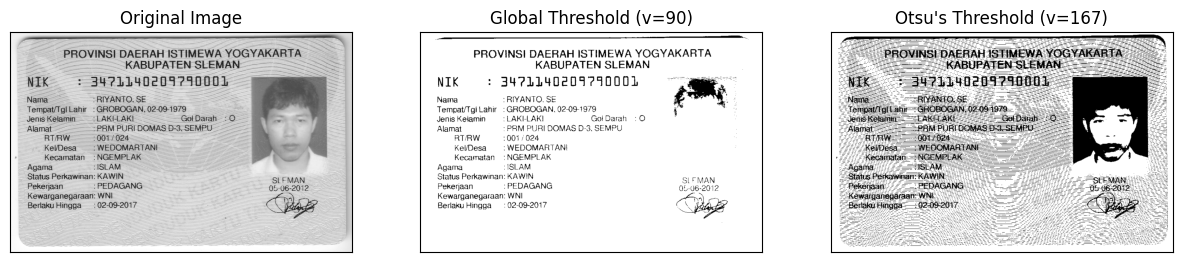

In [16]:
def _compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one of the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    return weight0 * var0 + weight1 * var1

def otsuThresholding(img: np.ndarray) -> np.ndarray:
    threshold_range = range(np.max(img)+1)
    criterias = np.array([_compute_otsu_criteria(img, th) for th in threshold_range])

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmin(criterias)]

    binary = img.copy()
    binary[binary > best_threshold] = 255
    binary[binary <= best_threshold] = 0

    return binary

if __name__ == '__main__':
    filename = '/content/drive/MyDrive/PCVK/ktp/ktp.png'
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Global Threshold (v=90)
    global_threshold = 90
    _, global_thresholded = cv2.threshold(img, global_threshold, 255, cv2.THRESH_BINARY)

    # Otsu Thresholding
    otsu_thresholded = otsuThresholding(img)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, 'gray')
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 2)
    plt.imshow(global_thresholded, 'gray')
    plt.title(f'Global Threshold (v={global_threshold})')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 3)
    plt.imshow(otsu_thresholded, 'gray')
    plt.title("Otsu's Threshold (v=167)")
    plt.xticks([]), plt.yticks([])

    plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images. Petunjuk:
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.
b. Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html
c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

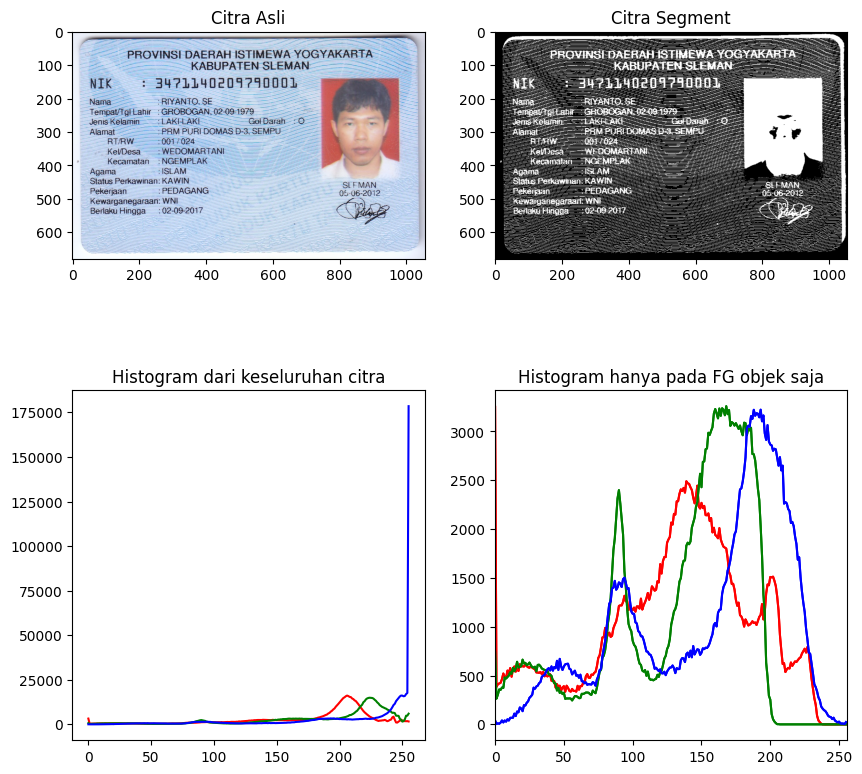

In [17]:
filename_3 = ('/content/drive/MyDrive/PCVK/ktp/ktp.png')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

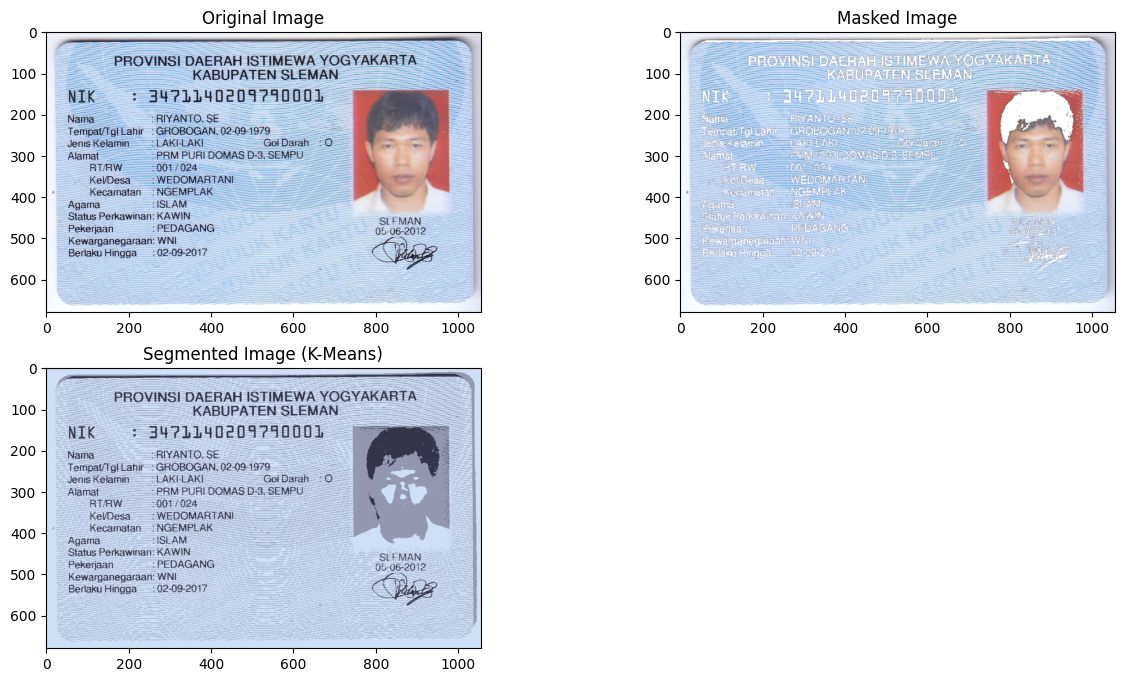

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
filename = '/content/drive/MyDrive/PCVK/ktp/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

E. Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang
telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


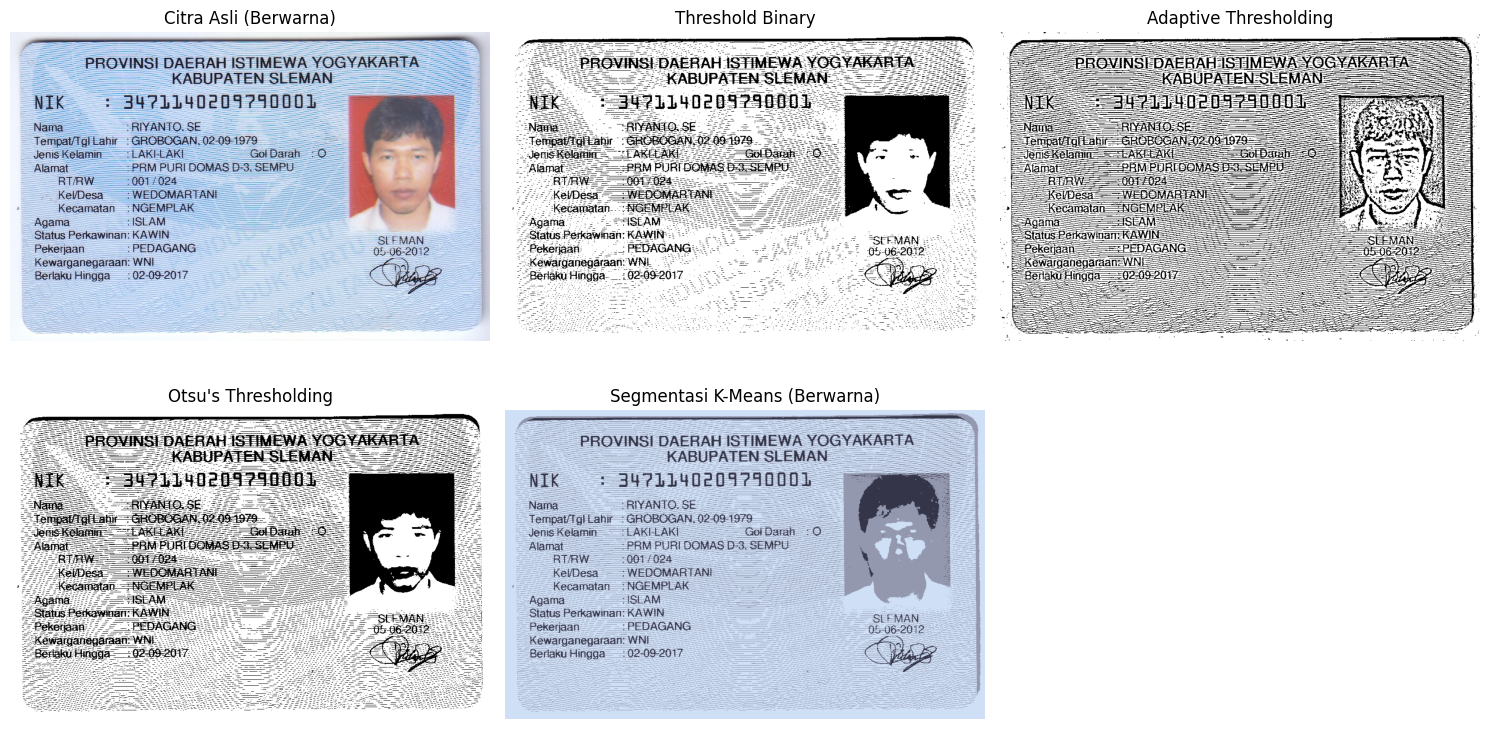

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


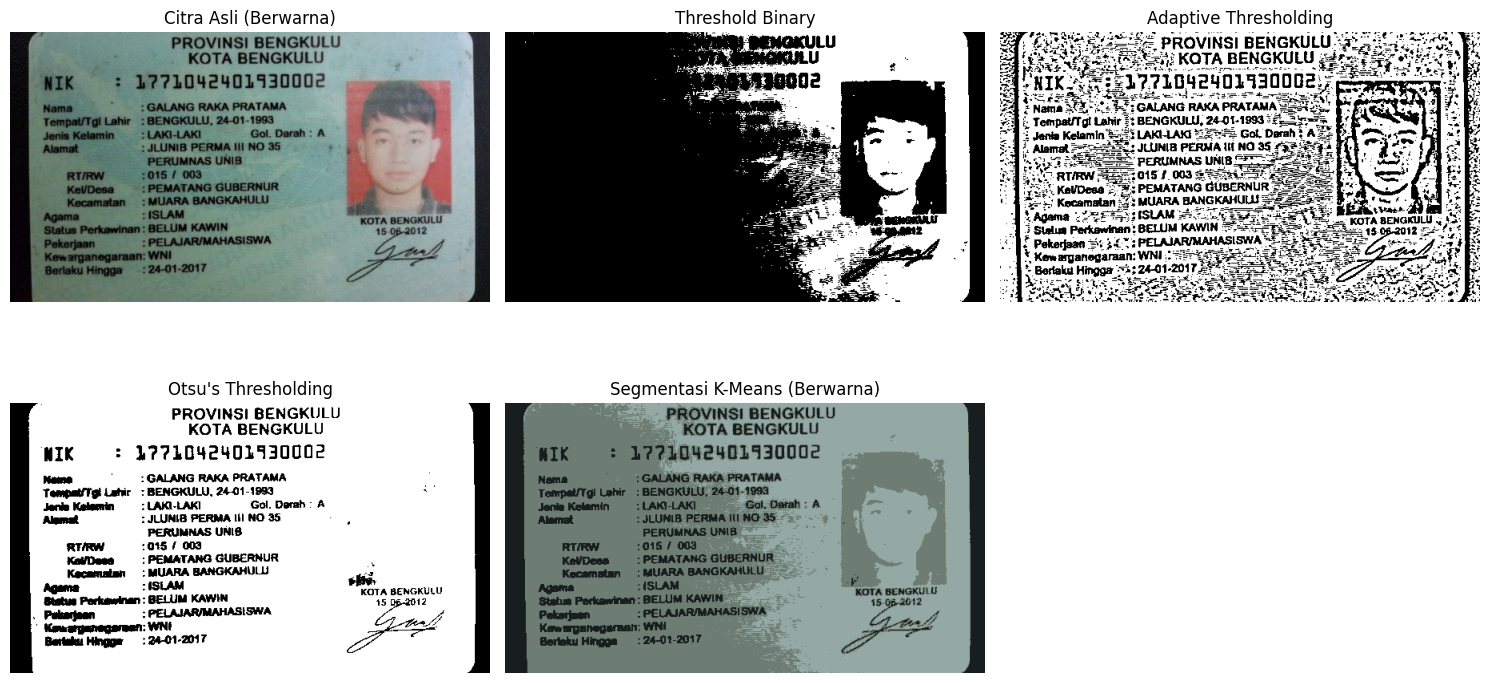

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


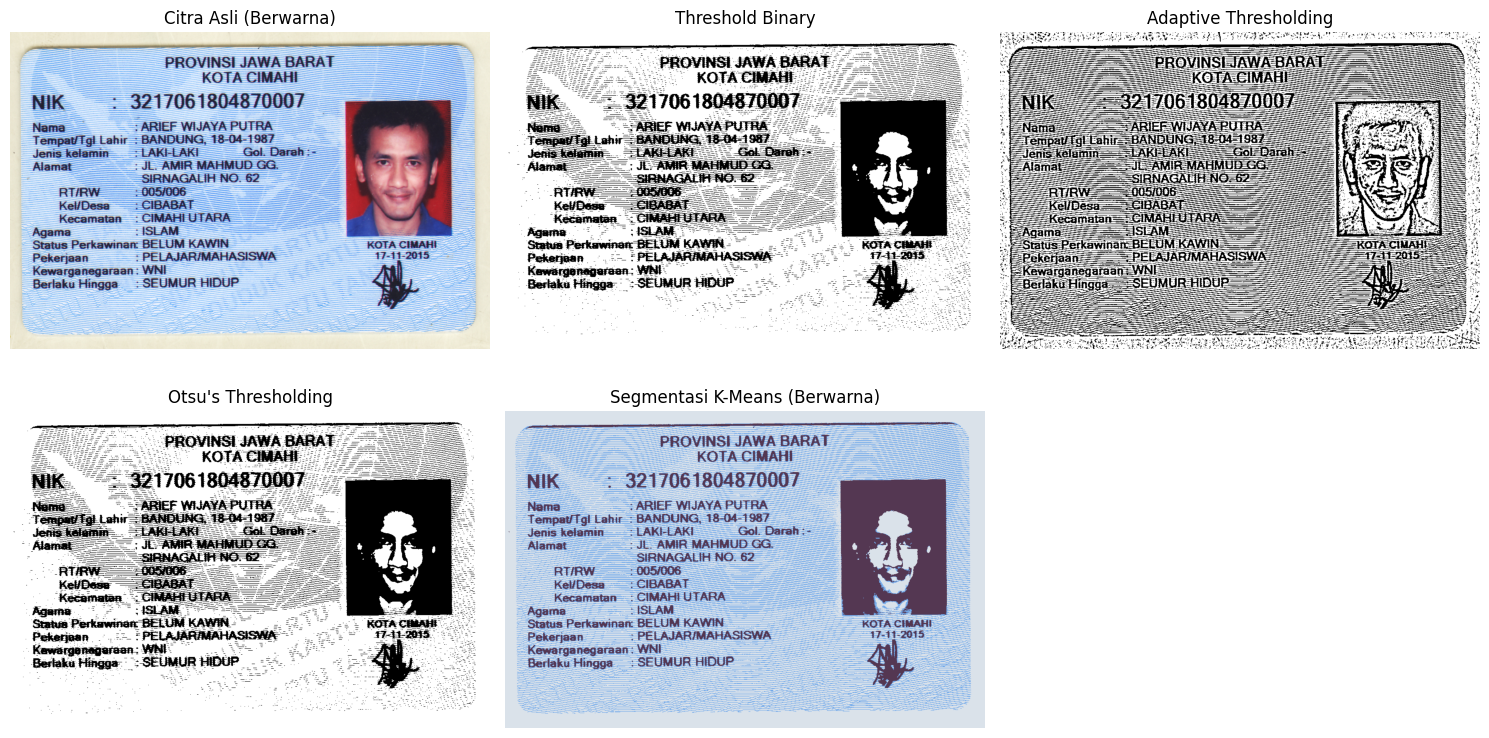

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


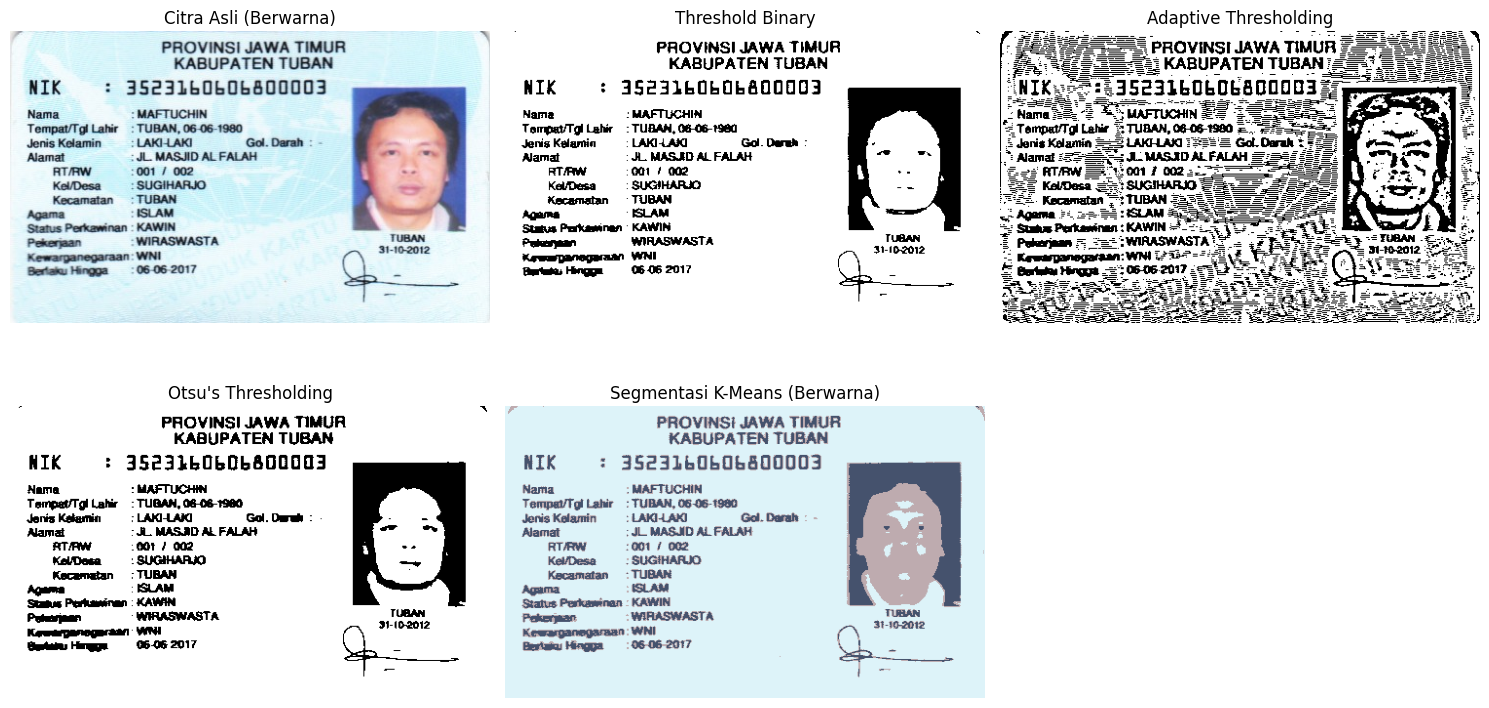

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


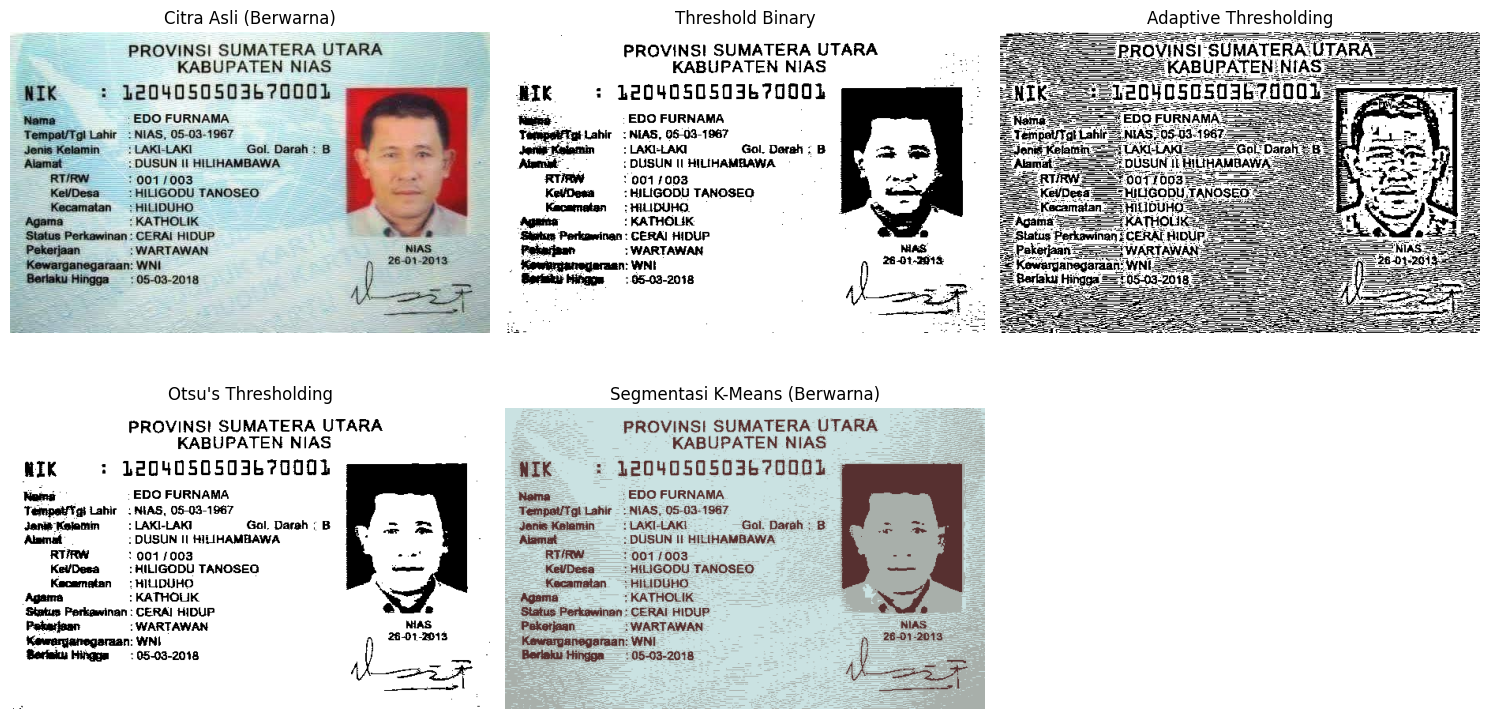

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


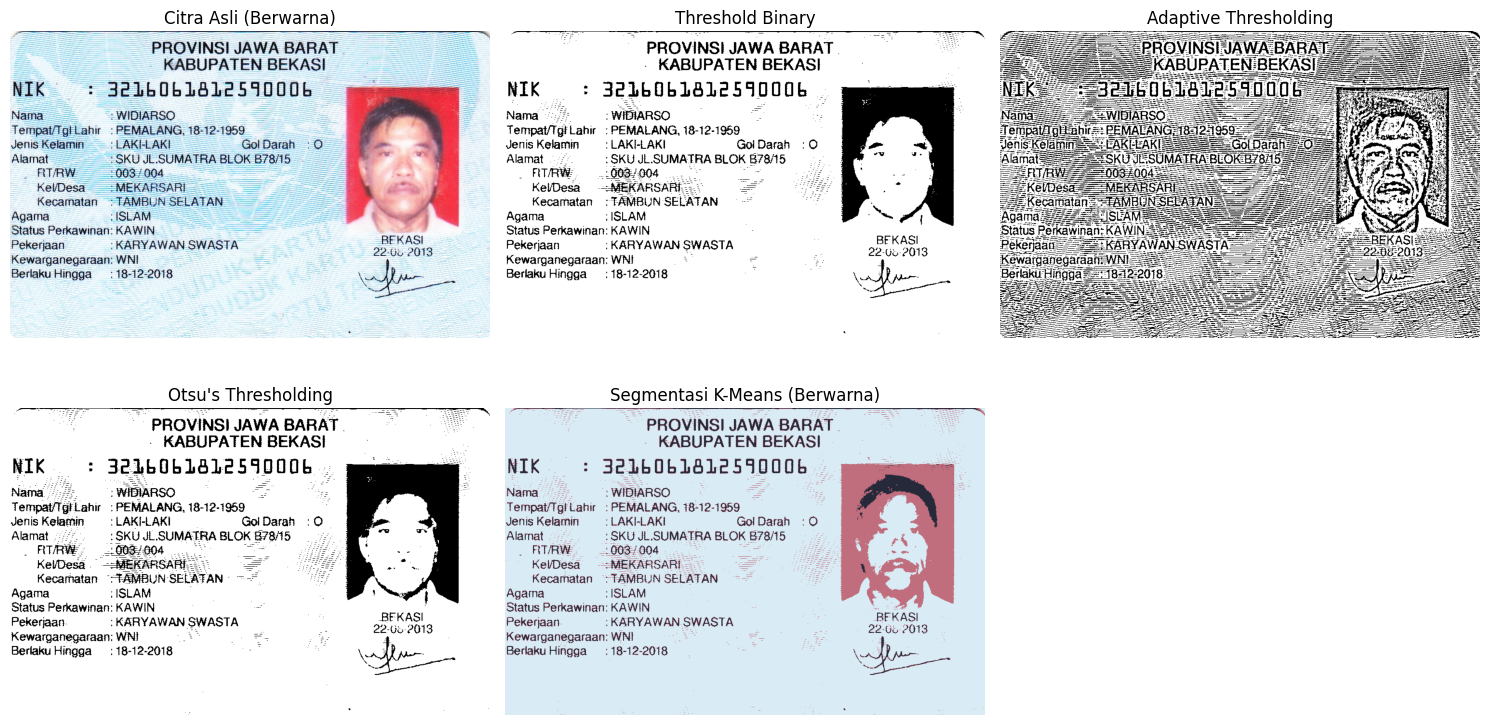

In [47]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.cluster import KMeans

# Path ke folder gambar
folder_path = '/content/drive/MyDrive/PCVK/ktp'  # Ganti dengan path folder Anda

# Fungsi untuk segmentasi K-Means dengan mempertahankan warna
def k_means_segmentation_color(img, k=3):
    # Ubah citra ke format yang dapat dikerjakan oleh K-Means
    img_flat = img.reshape((-1, 3))
    img_flat = np.float32(img_flat)

    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(img_flat)

    # Bentuk ulang citra hasil segmentasi
    segmented = kmeans.cluster_centers_.astype(np.uint8)[labels].reshape(img.shape)

    return segmented

# Loop untuk setiap gambar dalam folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # Pastikan hanya mengambil file gambar
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path, 1)  # Mode 1 untuk citra berwarna

        # Segmentasi K-Means
        k_means_segmented_img = k_means_segmentation_color(img, k=3)

        # Mendapatkan citra hasil thresholding
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Ubah citra ke grayscale
        thresh_binary, adaptive_thresh, otsu_thresh = apply_thresholding(gray_img)

        # Menampilkan citra dengan thresholding dan segmentasi K-Means
        plt.figure(figsize=(15, 8))

        plt.subplot(2, 3, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Tampilkan citra berwarna
        plt.title('Citra Asli (Berwarna)')
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.imshow(thresh_binary, cmap='gray')
        plt.title('Threshold Binary')
        plt.axis('off')

        plt.subplot(2, 3, 3)
        plt.imshow(adaptive_thresh, cmap='gray')
        plt.title('Adaptive Thresholding')
        plt.axis('off')

        plt.subplot(2, 3, 4)
        plt.imshow(otsu_thresh, cmap='gray')
        plt.title("Otsu's Thresholding")
        plt.axis('off')

        plt.subplot(2, 3, 5)
        plt.imshow(cv2.cvtColor(k_means_segmented_img, cv2.COLOR_BGR2RGB))  # Tampilkan citra berwarna
        plt.title('Segmentasi K-Means (Berwarna)')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
